The dataset consists of all the basic bank details of the customers.


1. ID - Represents a unique identification of an entry.
2. CUSTOMER ID - This represents the unique identification of a person.
3. MONTH - Represents the month of the year.
4. NAME - Represents the name of a person.
5. AGE - Represents the age of the person.
6. SSN - Represents the social security number of the person.
7. OCCUPATION - Represents the occupation of the person.
8. ANNUAL INCOME - Represents the yearly income of the person.
9. MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.
10. NUM BANK ACCOUNTS - This represents the number of bank accounts a person
holds.
11. NUM CREDIT CARD - This represents the number of other credit cards held by the
person.
12. INTEREST Rate - This represents the interest rate on a credit card.
13. NUM OF LOAN - Represents the number of loans taken from the bank.
14. TYPE OF LOAN - Represents the type of loan taken by the person.
15. DELAY FROM DUE DATE - Represents the average number of days delayed from the
payment date.
16. NUM OF DELAYED PAYMENT - Represents the average number of payments
delayed by a person.
17. CHANGED CREDIT LIMIT - This represents the percentage change in the credit card
limit.
18. NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.
19. CREDIT MIX - This represents the classification of the mix of credits. A credit mix refers to the multiple types of loan accounts you hold, such as credit cards, student loans, mortgages, and car loans.
20. OUTSTANDING DEBT - This represents the remaining debt to be paid(in USD).
21. CREDIT UTILIZATION RATIO - This represents the utilization ratio of credit cards.
22. CREDIT HISTORY AGE - This represents the age of the credit history of the person.
23. PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was
paid by the person.
24. TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).
25. AMOUNT INVESTED MONTHLY - Represents the monthly amount invested by the
customer(in USD)
26. PAYMENT BEHAVIOUR - Represents the payment behavior of the customer (in
USD)
27. MONTHLY BALANCE - Represents the monthly amount of the customer (in USD).

# Section A:

# Business Problem

Problem Statement:
Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligent system to segregate the people into credit
score brackets to reduce manual efforts.

Objective: The objective of this project is to explore the data to identify the pattern that causes
the person to have a good or bad or standard type credit score and build a machine
learning model that should be able to predict or classify the credit score type. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Concatenating two dataframes (training_data and deployment_data) for preprocessing

Train data and deployment data are combined for preprocessing. 
After preprocessing, train data is separated from deployment data.
Further, it is split into train-test data.
After training the model, it is used to predict credit score category of bank customers.

In [2]:
df =pd.read_csv('train.csv')
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [3]:
df_deployment =pd.read_csv('test.csv')
df_deployment.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,NaN,3037.986667
Num_Bank_Accounts,3,3,3,3,2


In [4]:
df.shape

(100000, 28)

In [5]:
df_deployment.shape

(50000, 27)

In [6]:
df_concat = pd.concat([df, df_deployment], ignore_index=True )
df_concat.shape

(150000, 28)

In [7]:
df_concat_copy = df_concat.copy()

# Data Pre-processing

In [8]:
df_concat.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
#Datatype of following features are incorrect in the dataset.
#Name- Does not add value to the case study. (Dropped the feature)
#Month - Does not add value to the case study. (Dropped the feature)
#Age - Remove "_". Should be numeric. Age in between 0 to 100.
#Occupation- Remove "_".
#SSN - Does not add value to the case study. (Dropped the feature)
#Annual income- Remove "_". Should be numeric (float64).
#Monthly_Inhand_Salary - Replace null values with median.
#Num_Credit_Card: >10, then replace with median.
#Interest_Rate:>100, then replace with median.
#Num_of_Loan - Remove "_", >=0 and <100,  Should be numeric.
#Type_of_Loan : Drop the feature.
#Delay_from_due_date : >=0 and <100
#Num_of_Delayed_Payment- Remove "_", >=0 and <100,  Should be numeric 
#Changed_Credit_Limit - Remove "_".Replace null values with median. Should be numeric (float64).
#Num_Credit_Inquiries-  Replace null values with median.  >=0 and <100. If it is float then replace with median and convert to int64.
#Credit_Mix - Replace observations of _ with median. 
#Credit_Utilization_Ratio - No change.
#Outstanding_Debt - Remove "_". Should be numeric (float64).
#Credit_History_Age- Replace null values with median. Then, Needs to be modified and converted to numeric.
#Payment_of_Min_Amount- Replace 'NM' with median.
#Amount_invested_monthly - Remove "_" and Should be numeric (float64).
#Payment_Behaviour - Replace !@9#%8 with median. Need to find unique values and perform ordinal encoding (numeric)
#Monthly_Balance - Remove "_". Should be numeric.
#Credit_Score - No change.

In [10]:
df_concat = df_concat.drop('Month', axis=1)
df_concat = df_concat.drop('Name', axis=1)
df_concat = df_concat.drop('SSN', axis=1)
#df_concat = df_concat.drop('Type_of_Loan', axis=1)

In [11]:
df_concat['Type_of_Loan'] = df_concat['Type_of_Loan'].replace(np.nan, 'None')

Defining each type of loan as separate feature

In [12]:
s1=set()
df_concat['L1']=df_concat['Type_of_Loan'].str.split(', ')
df_concat['L1'].head()

0    [Auto Loan, Credit-Builder Loan, Personal Loan...
1    [Auto Loan, Credit-Builder Loan, Personal Loan...
2    [Auto Loan, Credit-Builder Loan, Personal Loan...
3    [Auto Loan, Credit-Builder Loan, Personal Loan...
4    [Auto Loan, Credit-Builder Loan, Personal Loan...
Name: L1, dtype: object

In [13]:
s1 = set().union(*df_concat['L1'].apply(set))
print(s1)

{'and Home Equity Loan', 'Payday Loan', 'and Mortgage Loan', 'Debt Consolidation Loan', 'Credit-Builder Loan', 'None', 'and Debt Consolidation Loan', 'Auto Loan', 'and Auto Loan', 'Personal Loan', 'and Not Specified', 'and Personal Loan', 'and Credit-Builder Loan', 'Not Specified', 'Home Equity Loan', 'Student Loan', 'Mortgage Loan', 'and Payday Loan', 'and Student Loan'}


In [14]:
s3=set()
for i in s1:
    if 'and ' not in i:
        s3.add(i)
    
s3

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'None',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

In [15]:
s3.remove('Not Specified')

In [16]:
for i in s3:
    df_concat[i] = df_concat['L1'].apply(lambda x: 1 if i in x else 0 )

In [17]:
df_concat.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,0x1602,0x1603,0x1604,0x1605,0x1606,0x1607,0x1608,0x1609,0x160e,0x160f
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1,CUS_0x21b1
Age,23,23,-500,23,23,23,23,23,28_,28
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,_______,Teacher
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333,NaN,1824.843333,1824.843333,3037.986667,3037.986667
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2
Num_Credit_Card,4,4,4,4,4,4,4,4,4,4
Interest_Rate,3,3,3,3,3,3,3,3,6,6
Num_of_Loan,4,4,4,4,4,4,4,4,1,1


In [18]:
df_concat.rename(columns={'None': 'No_loan'}, inplace=True)

In [19]:
s4={'No_loan','Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

for i in s4:
    print(df_concat[i].value_counts(normalize=True))

0   0.740960
1   0.259040
Name: Payday Loan, dtype: float64
0   0.739120
1   0.260880
Name: Credit-Builder Loan, dtype: float64
0   0.747280
1   0.252720
Name: Personal Loan, dtype: float64
0   0.750640
1   0.249360
Name: Debt Consolidation Loan, dtype: float64
0   0.747440
1   0.252560
Name: Home Equity Loan, dtype: float64
0   0.885920
1   0.114080
Name: No_loan, dtype: float64
0   0.747200
1   0.252800
Name: Student Loan, dtype: float64
0   0.746560
1   0.253440
Name: Mortgage Loan, dtype: float64
0   0.751840
1   0.248160
Name: Auto Loan, dtype: float64


In [20]:
df_concat['Age'] = df_concat['Age'].str.strip('_')

In [21]:
df_concat.Occupation.replace('_______', np.NaN, inplace=True)

In [22]:

df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [23]:
df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')
df_concat['Annual_Income'] = df_concat['Annual_Income'].str.strip('_')
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].str.strip('_')
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].str.strip('_')
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].str.strip('_')

In [24]:
df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Credit_Mix'] = df_concat['Credit_Mix'].str.strip('_')
df_concat['Outstanding_Debt'] = df_concat['Outstanding_Debt'].str.strip('_')
df_concat['Amount_invested_monthly'] = df_concat['Amount_invested_monthly'].str.strip('_')
df_concat['Monthly_Balance'] = df_concat['Monthly_Balance'].str.strip('_')

For the same customer, the dataset includes records taken in different months.

Hence, the records of same customers are grouped and median for other numerical features are computed.

These computed median values are used for null values imputation.

In [25]:
gb1= df_concat.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().to_dict()
gb1

{'CUS_0x1000': 2706.1616666666664,
 'CUS_0x1009': 4250.39,
 'CUS_0x100b': 9549.7825,
 'CUS_0x1011': 5208.8725,
 'CUS_0x1013': 7962.415000000001,
 'CUS_0x1015': 3725.585,
 'CUS_0x1018': 5014.5675,
 'CUS_0x1026': 14463.856666666668,
 'CUS_0x102d': 7256.043333333334,
 'CUS_0x102e': 4197.953333333334,
 'CUS_0x1032': 5274.245,
 'CUS_0x1037': 1086.42375,
 'CUS_0x1038': 10959.43,
 'CUS_0x103e': 8262.233333333334,
 'CUS_0x1041': 894.1758333333332,
 'CUS_0x1044': 2748.799166666666,
 'CUS_0x1048': 3680.295,
 'CUS_0x104a': 1461.4491666666663,
 'CUS_0x104e': 1688.405833333333,
 'CUS_0x104f': 992.73625,
 'CUS_0x1051': 2859.518333333333,
 'CUS_0x1056': 1196.8216666666667,
 'CUS_0x1057': 7250.096666666667,
 'CUS_0x105b': 2289.593700256465,
 'CUS_0x105c': 10596.8,
 'CUS_0x1063': 10628.896666666666,
 'CUS_0x1069': 4799.445,
 'CUS_0x106f': 11102.589999999998,
 'CUS_0x1075': 1933.468717801689,
 'CUS_0x107c': 4179.2125,
 'CUS_0x107e': 6269.9925,
 'CUS_0x1087': 3377.7608333333333,
 'CUS_0x108a': 2554.81382

In [26]:
df_concat['Monthly_Inhand_Salary']=df_concat['Monthly_Inhand_Salary'].fillna(df_concat['Customer_ID'].map(gb1))
df_concat.Monthly_Inhand_Salary.isnull().sum()

0

In [27]:
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].astype(float)

In [28]:
gb2= df_concat.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().to_dict()
gb2

{'CUS_0x1000': 25.0,
 'CUS_0x1009': 18.0,
 'CUS_0x100b': 7.0,
 'CUS_0x1011': 15.0,
 'CUS_0x1013': 9.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 22.0,
 'CUS_0x1026': 2.0,
 'CUS_0x102d': 5.0,
 'CUS_0x102e': 10.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 15.0,
 'CUS_0x1038': 13.0,
 'CUS_0x103e': 17.0,
 'CUS_0x1041': 17.0,
 'CUS_0x1044': 4.0,
 'CUS_0x1048': 8.0,
 'CUS_0x104a': 6.0,
 'CUS_0x104e': 17.0,
 'CUS_0x104f': 19.0,
 'CUS_0x1051': 11.0,
 'CUS_0x1056': 16.0,
 'CUS_0x1057': 20.0,
 'CUS_0x105b': 12.0,
 'CUS_0x105c': 6.0,
 'CUS_0x1063': 16.0,
 'CUS_0x1069': 17.0,
 'CUS_0x106f': 7.0,
 'CUS_0x1075': 11.0,
 'CUS_0x107c': 16.0,
 'CUS_0x107e': 10.0,
 'CUS_0x1087': 11.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 20.0,
 'CUS_0x1098': 13.0,
 'CUS_0x109b': 12.0,
 'CUS_0x109d': 18.0,
 'CUS_0x109f': 1.0,
 'CUS_0x10a9': 10.0,
 'CUS_0x10aa': 10.0,
 'CUS_0x10ac': 11.0,
 'CUS_0x10b3': 0.0,
 'CUS_0x10b6': 12.0,
 'CUS_0x10bb': 3.0,
 'CUS_0x10c0': 25.0,
 'CUS_0x10c5': 5.0,
 'CUS_0x10d7': 19.0,
 'CUS_0x10dd': 19.0,
 'CUS_0

In [29]:
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].fillna(df_concat['Customer_ID'].map(gb2))
df_concat.Num_of_Delayed_Payment.isnull().sum()

0

In [30]:
gb3= df_concat.groupby('Customer_ID')['Num_Credit_Inquiries'].median().to_dict()
gb3

{'CUS_0x1000': 11.0,
 'CUS_0x1009': 4.0,
 'CUS_0x100b': 4.0,
 'CUS_0x1011': 7.0,
 'CUS_0x1013': 3.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 8.0,
 'CUS_0x1026': 3.0,
 'CUS_0x102d': 3.0,
 'CUS_0x102e': 4.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 3.0,
 'CUS_0x1038': 10.0,
 'CUS_0x103e': 4.0,
 'CUS_0x1041': 10.0,
 'CUS_0x1044': 5.0,
 'CUS_0x1048': 7.0,
 'CUS_0x104a': 4.0,
 'CUS_0x104e': 6.0,
 'CUS_0x104f': 7.0,
 'CUS_0x1051': 5.0,
 'CUS_0x1056': 8.0,
 'CUS_0x1057': 4.0,
 'CUS_0x105b': 0.0,
 'CUS_0x105c': 0.0,
 'CUS_0x1063': 12.0,
 'CUS_0x1069': 5.0,
 'CUS_0x106f': 8.0,
 'CUS_0x1075': 3.0,
 'CUS_0x107c': 7.0,
 'CUS_0x107e': 8.0,
 'CUS_0x1087': 7.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 3.0,
 'CUS_0x1098': 8.0,
 'CUS_0x109b': 1.0,
 'CUS_0x109d': 11.0,
 'CUS_0x109f': 0.0,
 'CUS_0x10a9': 4.0,
 'CUS_0x10aa': 4.0,
 'CUS_0x10ac': 1.0,
 'CUS_0x10b3': 3.0,
 'CUS_0x10b6': 1.0,
 'CUS_0x10bb': 0.0,
 'CUS_0x10c0': 8.0,
 'CUS_0x10c5': 0.0,
 'CUS_0x10d7': 14.0,
 'CUS_0x10dd': 4.0,
 'CUS_0x10df': 14.0,
 'CUS_0x10e2

In [31]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].fillna(df_concat['Customer_ID'].map(gb3))
df_concat.Num_Credit_Inquiries.isnull().sum()

0

In [32]:
gb4= df_concat.groupby('Customer_ID')['Amount_invested_monthly'].median().to_dict()
gb4

{'CUS_0x1000': 161.99123459352285,
 'CUS_0x1009': 155.14105344210978,
 'CUS_0x100b': 424.0032051421769,
 'CUS_0x1011': 288.57138238355003,
 'CUS_0x1013': 323.42812789415797,
 'CUS_0x1015': 253.94590381175408,
 'CUS_0x1018': 289.8643803222876,
 'CUS_0x1026': 422.2033442904601,
 'CUS_0x102d': 327.9089464271358,
 'CUS_0x102e': 124.82374175928365,
 'CUS_0x1032': 152.32245488410052,
 'CUS_0x1037': 91.71666843614115,
 'CUS_0x1038': 447.24445995494773,
 'CUS_0x103e': 476.9266570683169,
 'CUS_0x1041': 43.16179080226145,
 'CUS_0x1044': 163.74197577772878,
 'CUS_0x1048': 133.51336229583663,
 'CUS_0x104a': 84.32642463336306,
 'CUS_0x104e': 74.86960972335518,
 'CUS_0x104f': 57.7897005015798,
 'CUS_0x1051': 72.35841856459858,
 'CUS_0x1056': 97.99882337668056,
 'CUS_0x1057': 385.5637343909271,
 'CUS_0x105b': 125.90837326936463,
 'CUS_0x105c': 458.85506213804473,
 'CUS_0x1063': 316.59670034091255,
 'CUS_0x1069': 144.0449534474321,
 'CUS_0x106f': 537.4187157412816,
 'CUS_0x1075': 115.02475756318265,
 

In [33]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].fillna(df_concat['Customer_ID'].map(gb4))
df_concat.Amount_invested_monthly.isnull().sum()

0

In [34]:
gb5= df_concat.groupby('Customer_ID')['Monthly_Balance'].median().to_dict()
gb5

{'CUS_0x1000': 345.6838416506744,
 'CUS_0x1009': 417.8696409917354,
 'CUS_0x100b': 824.3557245437784,
 'CUS_0x1011': 373.8809288201069,
 'CUS_0x1013': 542.1620582640456,
 'CUS_0x1015': 397.5606221143995,
 'CUS_0x1018': 276.22367830126484,
 'CUS_0x1026': 1079.865389370064,
 'CUS_0x102d': 630.1226363254034,
 'CUS_0x102e': 464.8998432861021,
 'CUS_0x1032': 480.75851651478183,
 'CUS_0x1037': 258.7706288168823,
 'CUS_0x1038': 661.8128424966927,
 'CUS_0x103e': 567.0214188379721,
 'CUS_0x1041': 252.20605063953434,
 'CUS_0x1044': 376.2660793823086,
 'CUS_0x1048': 272.86291414474647,
 'CUS_0x104a': 302.91163544834376,
 'CUS_0x104e': 307.7636799326268,
 'CUS_0x104f': 289.63507237550925,
 'CUS_0x1051': 442.73601214390817,
 'CUS_0x1056': 258.8146767383343,
 'CUS_0x1057': 636.422471527819,
 'CUS_0x105b': 410.1730863125262,
 'CUS_0x105c': 813.6220874228557,
 'CUS_0x1063': 815.5959250361045,
 'CUS_0x1069': 440.4317034383936,
 'CUS_0x106f': 751.6398997851745,
 'CUS_0x1075': 353.2159802447077,
 'CUS_0x

In [35]:
df_concat['Monthly_Balance']=df_concat['Monthly_Balance'].fillna(df_concat['Customer_ID'].map(gb5))
df_concat.Monthly_Balance.isnull().sum()

0

In [36]:
df_concat.isnull().sum()

ID                              0
Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
L1                              0
Payday Loan                     0
Student Loan                    0
Personal Loan                   0
Debt Consolida

In [37]:
df_concat['Credit_History_Age'].mode()

0    17 Years and 11 Months
Name: Credit_History_Age, dtype: object

In [38]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].fillna(df_concat['Credit_History_Age'].mode())

In [39]:
df_concat['Credit_History_Age'].isnull().sum()

13500

In [40]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].replace(np.NaN , '17 Years and 11 Months')

In [41]:
df_concat['Credit_History_Age'].isnull().sum()

0

In [42]:
df_concat.columns.get_loc('Credit_History_Age')

18

In [43]:
df_concat['Split_age'] = df_concat['Credit_History_Age'].str.split(' ')
df_concat['Split_age'].head()

0     [22, Years, and, 1, Months]
1    [17, Years, and, 11, Months]
2     [22, Years, and, 3, Months]
3     [22, Years, and, 4, Months]
4     [22, Years, and, 5, Months]
Name: Split_age, dtype: object

In [44]:
int(df_concat['Split_age'][1][0]) + int(df_concat['Split_age'][1][3])/12

17.916666666666668

In [45]:
df_concat['Credit_History_Age_int'] = np.random.randint(df_concat.shape[0])
for i in range(0,df_concat.shape[0]):
    df_concat['Credit_History_Age_int'][i] = int(df_concat['Split_age'][i][0]) + int(df_concat['Split_age'][i][3])/12

In [46]:
df_concat =df_concat.drop('Split_age', axis=1)
df_concat =df_concat.drop('Credit_History_Age', axis=1)

In [47]:
df_concat['Annual_Income']=df_concat['Annual_Income'].astype(float)

In [48]:
#df_concat.loc[0:100000,"Num_Credit_Card"] = df.loc[0:99999,"Num_Credit_Card"]
#df_concat.loc[100000:150000,"Num_Credit_Card"] = df_test.loc[100000:150000,"Num_Credit_Card"]

In [49]:
df_concat.shape

(150000, 35)

In [50]:
md= df_concat["Num_Credit_Card"].median()
df_concat['Num_Credit_Card'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 or x<0 else x)

In [51]:
df_concat['Num_of_Loan']=df_concat['Num_of_Loan'].astype(float)

In [52]:
df_concat["Age"] = df_concat_copy['Age']
df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Age']=df_concat['Age'].astype(float)

In [53]:
md= df_concat["Age"].median()
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x>100 else x)
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x<0 else x)

In [54]:
md= df_concat["Num_of_Loan"].median()
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 else x)
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x<0 else x)

In [55]:
md= df_concat["Interest_Rate"].median()
df_concat['Interest_Rate'] = df_concat['Interest_Rate'].apply(lambda x: md if x>100 or x<0 else x)

In [56]:
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].astype(float)

In [57]:
md= df_concat["Num_of_Delayed_Payment"].median()
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].apply(lambda x: md if x>100 or x<0 else x)

In [58]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].fillna(df_concat["Changed_Credit_Limit"].mode()) 


In [59]:
df_concat["Changed_Credit_Limit"].isnull().sum()

0

In [60]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].replace('' , 0)

In [61]:
df_concat['Changed_Credit_Limit']=df_concat['Changed_Credit_Limit'].astype(float)

In [62]:
df_concat.dtypes

ID                           object
Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
L1                           object
Payday Loan                   int64
Student Loan                  int64
Personal Loan               

In [63]:
df_concat['Occupation']=df_concat_copy['Occupation']
df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')

In [64]:
df_concat.Occupation.replace('', np.NaN, inplace=True)
df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [65]:
md= df_concat["Num_Credit_Inquiries"].median()
df_concat['Num_Credit_Inquiries'] = df_concat['Num_Credit_Inquiries'].apply(lambda x: md if x>100 or x<0 else x)

In [66]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].astype(float)

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

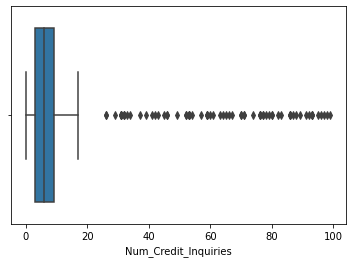

In [67]:
sns.boxplot(df_concat['Num_Credit_Inquiries'])

In [68]:
Q1= df_concat['Num_Credit_Inquiries'].quantile(0.25)
Q2 = df_concat['Num_Credit_Inquiries'].quantile(0.75)
IQR1= Q2-Q1
len(df_concat['Num_Credit_Inquiries'][df_concat['Num_Credit_Inquiries']>(Q2+(1.5*IQR1))])

71

71 outliers can be removed during outlier treatment.

In [69]:
mode=df_concat["Credit_Mix"].mode()
str(mode[0])

'Standard'

In [70]:
df_concat['Credit_Mix'].value_counts()

Standard    54858
Good        36597
            30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [71]:
#df_concat['Credit_Mix']=df_concat['Credit_Mix'].replace( '_',  str(mode[0]))

In [72]:
df_concat['Credit_Mix'].replace('', np.NaN, inplace=True)
df_concat.Credit_Mix.fillna(method='ffill', inplace = True)
df_concat.Credit_Mix.isnull().sum()

1

In [73]:
df_concat['Credit_Mix']=df_concat['Credit_Mix'].replace( np.NaN,  'Standard')

In [74]:
df_concat.Credit_Mix.isnull().sum()

0

In [75]:
df_concat['Credit_Mix'].value_counts()

Standard    68729
Good        45562
Bad         35709
Name: Credit_Mix, dtype: int64

In [76]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].str.strip('_')

In [77]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].astype(float)

In [78]:
mode=df_concat["Payment_of_Min_Amount"].mode()
mode

0    Yes
Name: Payment_of_Min_Amount, dtype: object

In [79]:
df_concat["Payment_of_Min_Amount"].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [80]:
df_concat['Payment_of_Min_Amount']=df_concat['Payment_of_Min_Amount'].replace( 'NM',  np.NaN)
df_concat.Payment_of_Min_Amount.fillna(method='ffill', inplace = True)
df_concat.Payment_of_Min_Amount.isnull().sum()

0

In [81]:
df_concat["Payment_of_Min_Amount"].value_counts()

Yes    89172
No     60828
Name: Payment_of_Min_Amount, dtype: int64

In [82]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].str.strip('_')

In [83]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].astype(float)

<AxesSubplot:xlabel='Amount_invested_monthly'>

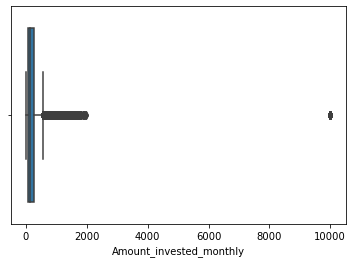

In [84]:
sns.boxplot(df_concat['Amount_invested_monthly'])

In [85]:
Q1= df_concat['Amount_invested_monthly'].quantile(0.25)
Q2 = df_concat['Amount_invested_monthly'].quantile(0.75)
IQR1= Q2-Q1
len(df_concat['Amount_invested_monthly'][df_concat['Amount_invested_monthly']>(Q2+(1.5*IQR1))])

15127

In [86]:
df_concat.drop('Monthly_Balance', axis=1, inplace=True)

In [87]:
mode=df_concat["Payment_Behaviour"].mode()
mode

0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [88]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.254713
High_spent_Medium_value_payments   0.176413
Low_spent_Medium_value_payments    0.137987
High_spent_Large_value_payments    0.137100
High_spent_Small_value_payments    0.113273
Low_spent_Large_value_payments     0.104513
!@9#%8                             0.076000
Name: Payment_Behaviour, dtype: float64

In [89]:
df_concat['Payment_Behaviour'] = df_concat_copy['Payment_Behaviour']
df_concat['Payment_Behaviour']=df_concat['Payment_Behaviour'].replace( '!@9#%8',  np.NaN)
df_concat.Payment_Behaviour.fillna(method='ffill', inplace = True)
df_concat.Payment_Behaviour.isnull().sum()

0

In [90]:
#df_concat['Payment_Behaviour']=df_concat['Payment_Behaviour'].replace( '!@9#%8',  mode[0])

In [91]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.275173
High_spent_Medium_value_payments   0.191400
Low_spent_Medium_value_payments    0.149433
High_spent_Large_value_payments    0.148453
High_spent_Small_value_payments    0.122513
Low_spent_Large_value_payments     0.113027
Name: Payment_Behaviour, dtype: float64

In [92]:
df_target= df_concat['Credit_Score']

In [93]:
df_target=pd.DataFrame(df_target.loc[0:99999])

In [94]:
df_target.shape

(100000, 1)

In [95]:
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Good', 2)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Standard', 1)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Poor', 0)

In [96]:
df_concat.isnull().sum()

ID                              0
Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Credit_Score                50000
L1                              0
Payday Loan                     0
Student Loan                    0
Personal Loan                   0
Debt Consolidation Loan         0
Home Equity Loan                0
Credit-Builder

In [97]:
df_concat['Amount_invested_monthly'].isnull().sum()

6750

In [98]:

df_concat.Amount_invested_monthly.fillna(method='ffill', inplace = True)
df_concat.Amount_invested_monthly.isnull().sum()

0

In [99]:
df_concat['Num_Bank_Accounts']=df_concat['Num_Bank_Accounts'].astype(float)
df_concat['Delay_from_due_date']=df_concat['Delay_from_due_date'].astype(float)
df_concat['Interest_Rate']=df_concat['Interest_Rate'].astype(float)

In [100]:
df_concat.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payday Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Home Equity Loan,Credit-Builder Loan,No_loan,Mortgage Loan,Auto Loan,Credit_History_Age_int
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,33.477227,173055.202531,4192.647084,17.006940,3.614533,14.512340,3.527427,21.063400,13.427313,10.166229,6.304133,1426.220376,32.283309,1432.513579,638.163182,0.259040,0.252800,0.252720,0.249360,0.252560,0.260880,0.114080,0.253440,0.248160,18.539662
std,10.629711,1404214.602713,3182.841234,117.069476,2.620297,8.700260,2.605996,14.860154,6.203571,6.877983,4.142814,1155.127101,5.113315,8403.759977,2045.220592,0.438109,0.434619,0.434573,0.432644,0.434482,0.439116,0.317909,0.434982,0.431947,7.929617
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
25%,25.000000,19455.490000,1625.558333,3.000000,2.000000,8.000000,2.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.054731,30.947775,74.574704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,33.000000,37578.610000,3091.000000,6.000000,3.000000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.297058,71.280006,135.768699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.916667
75%,42.000000,72796.905000,5951.373333,7.000000,5.000000,20.000000,5.000000,28.000000,18.000000,14.640000,9.000000,1945.962500,36.487954,166.279555,266.275431,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,24.500000
max,100.000000,24198062.000000,15204.633333,1798.000000,100.000000,100.000000,100.000000,67.000000,100.000000,36.970000,99.000000,4998.070000,50.000000,82398.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000


In [101]:
p=df_concat.columns.get_loc('Credit_History_Age_int')
p

33

In [102]:
df_concat['split1'] = df_concat['Payment_Behaviour'].str.split('_')
df_concat.insert(loc=p+1, column = 'Spending_Behaviour', value=[df_concat['split1'][i][0] for i in range(df_concat.shape[0]) ])
df_concat.insert(loc=p+2, column = 'Payment_values', value=[df_concat['split1'][i][2] for i in range(df_concat.shape[0]) ])

df_concat.dtypes

ID                           object
Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Credit_Score                 object
L1                           object
Payday Loan                   int64
Student Loan                  int64
Personal Loan                 int64
Debt Consolidation Loan     

In [103]:
df_concat.drop(['split1', 'Payment_Behaviour','Type_of_Loan','L1'] , axis=1, inplace=True)

In [104]:
cleaned_df_ID = df_concat.copy()

In [105]:
#ID drop
#Customer_ID drop
df_concat =df_concat.drop('ID', axis=1)
df_concat =df_concat.drop('Customer_ID', axis=1)

# Outlier treatment and EDA

In [106]:
df_concat.shape

(150000, 31)

In [107]:
df_train= df_concat.loc[0:99999]

In [108]:
df_train.shape

(100000, 31)

In [109]:
df_train.tail(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score,Payday Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Home Equity Loan,Credit-Builder Loan,No_loan,Mortgage Loan,Auto Loan,Credit_History_Age_int,Spending_Behaviour,Payment_values
99995,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,23.000000,7.000000,11.500000,3.000000,Good,502.380000,34.663572,No,35.104023,60.971333,Poor,0,0,0,0,0,0,0,0,1,31.500000,High,Large
99996,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,18.000000,7.000000,11.500000,3.000000,Good,502.380000,40.565631,No,35.104023,54.185950,Poor,0,0,0,0,0,0,0,0,1,31.583333,High,Medium
99997,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,13.000000,2.000000,27.000000,6.000000,11.500000,3.000000,Good,502.380000,41.255522,No,35.104023,24.028477,Poor,0,0,0,0,0,0,0,0,1,31.666667,High,Large
99998,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,20.000000,6.000000,11.500000,3.000000,Good,502.380000,33.638208,No,35.104023,251.672582,Standard,0,0,0,0,0,0,0,0,1,31.750000,Low,Large
99999,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,18.000000,6.000000,11.500000,3.000000,Good,502.380000,34.192463,No,35.104023,167.163865,Poor,0,0,0,0,0,0,0,0,1,31.833333,Low,Large


In [110]:
df_test= df_concat.loc[100000:149999]

In [111]:
#dftrial = df_concat.loc[ 100000:149999, ['Age', 'Occupation']]
#dftrial

In [112]:
df_test.shape

(50000, 31)

In [113]:
df_train.shape

(100000, 31)

In [114]:
df_train_cat= df_train.select_dtypes(include= [np.object])

In [115]:
df_train_cat.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [116]:
df_train_num=df_train.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Credit_Score', 'Spending_Behaviour', 'Payment_values'], axis=1)
df_train_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payday Loan',
       'Student Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Credit-Builder Loan', 'No_loan', 'Mortgage Loan',
       'Auto Loan', 'Credit_History_Age_int'],
      dtype='object')

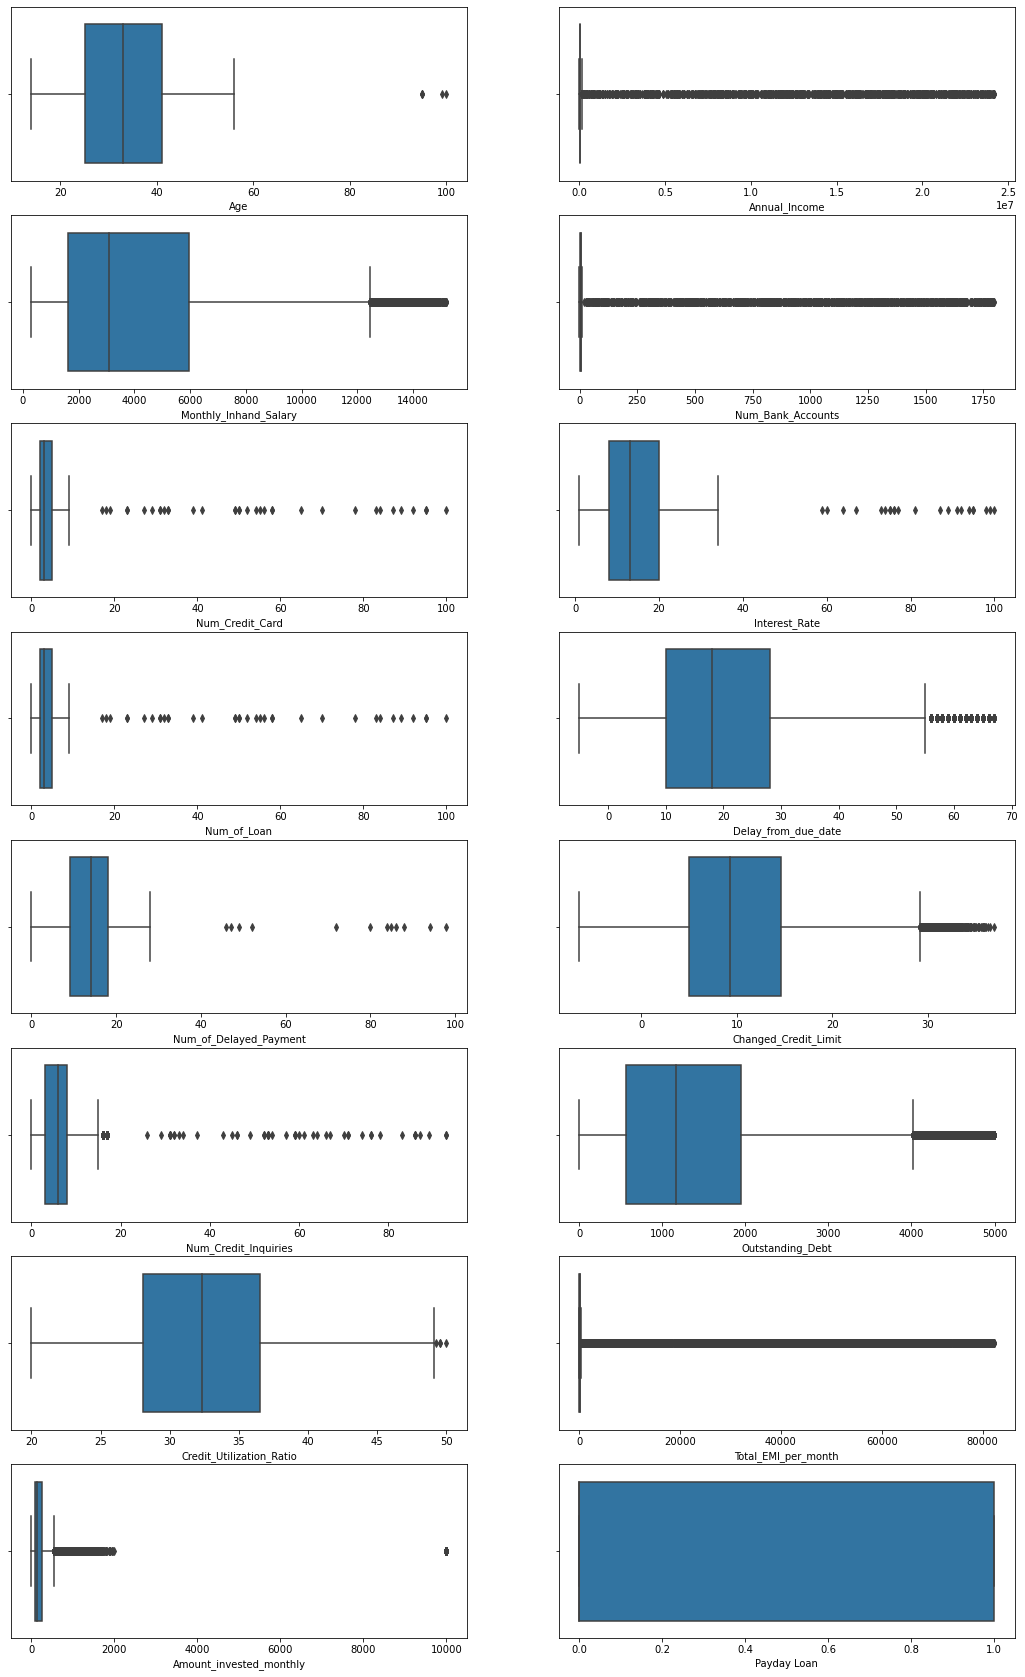

In [117]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(18,30))

for i, j in zip(df_train_num.columns, ax.flatten()):
    sns.boxplot(df_train_num[i], ax = j)

plt.show()

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

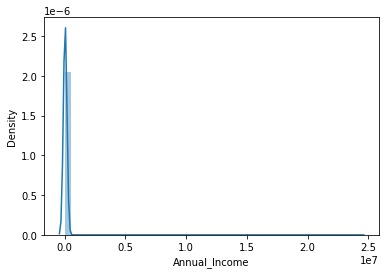

In [118]:
sns.distplot(df_train_num['Annual_Income'], hist=True)

In [119]:
df_train_outlier_treatment = df_train_num[['Age',  'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries',
       'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit','Credit_Utilization_Ratio']]

In [120]:
Q1 = df_train_outlier_treatment.quantile(0.25)
Q3 = df_train_outlier_treatment.quantile(0.75)

IQR = Q3-Q1

In [121]:
IQR

Age                        16.000000
Num_Bank_Accounts           4.000000
Num_Credit_Card             3.000000
Interest_Rate              12.000000
Num_of_Loan                 3.000000
Num_Credit_Inquiries        5.000000
Delay_from_due_date        18.000000
Num_of_Delayed_Payment      9.000000
Changed_Credit_Limit        9.690000
Credit_Utilization_Ratio    8.444096
dtype: float64

In [122]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_train.shape

(93403, 31)

In [123]:
df_train_num=df_train.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Credit_Score', 'Spending_Behaviour', 'Payment_values'], axis=1)
df_train_num.columns
col = df_train_num.columns
col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payday Loan',
       'Student Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Credit-Builder Loan', 'No_loan', 'Mortgage Loan',
       'Auto Loan', 'Credit_History_Age_int'],
      dtype='object')

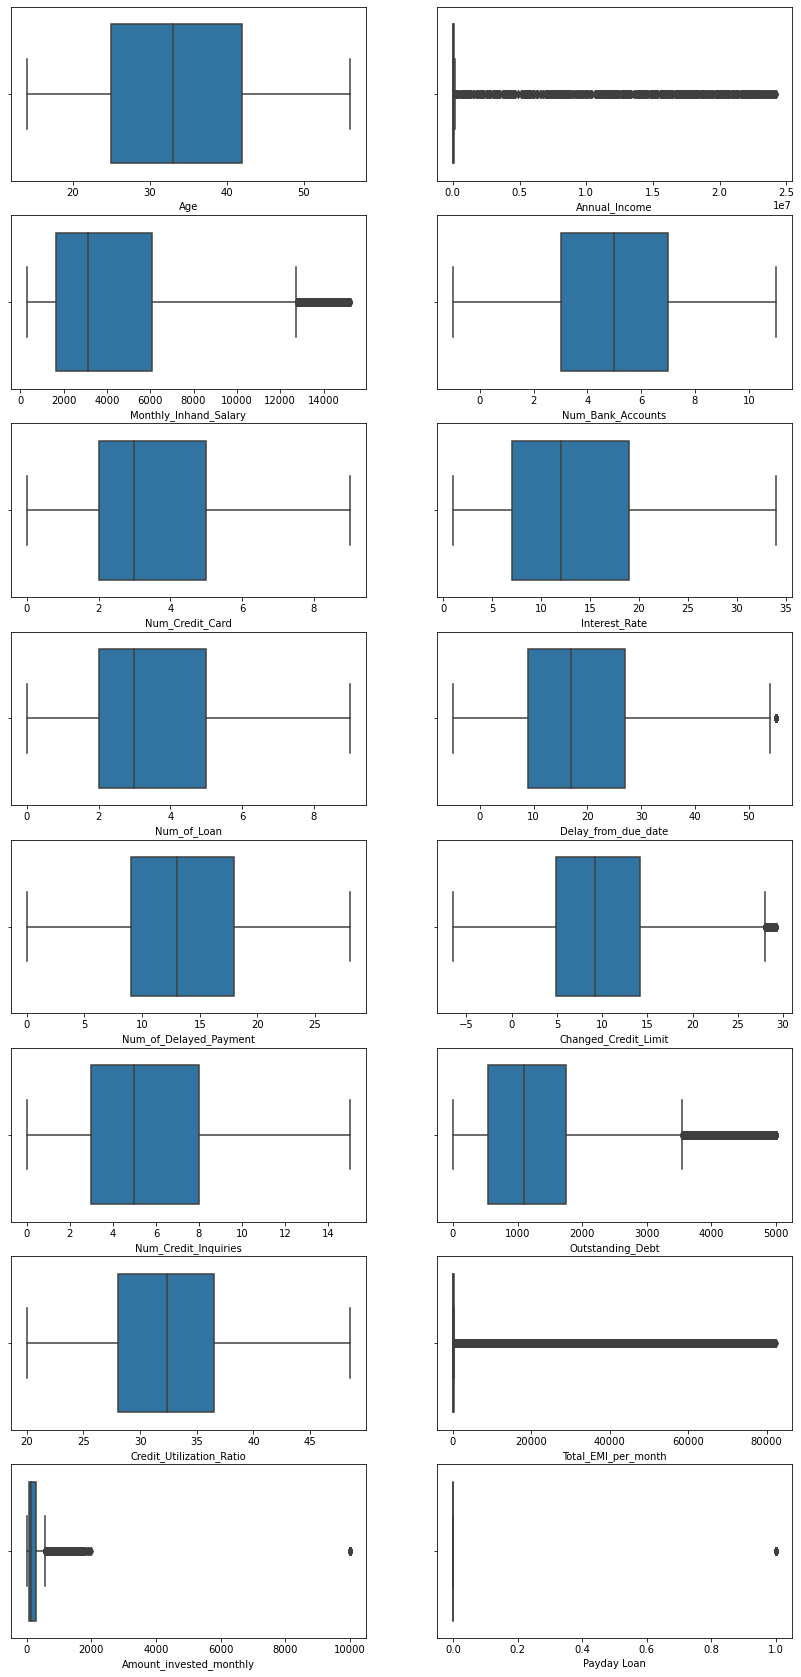

In [124]:
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=(14,30))
for var,subplot in zip(df_train_num.columns,ax.flatten()):
    sns.boxplot(df_train[var],ax=subplot)
plt.show()

In [125]:
Y = df_train['Credit_Score']
Y.shape

(93403,)

In [126]:
Y = df_train['Credit_Score']
Y = Y.replace('Good', 2)
Y = Y.replace('Standard', 1)
Y = Y.replace('Poor', 0)
Y.shape

(93403,)

Univariate Analysis

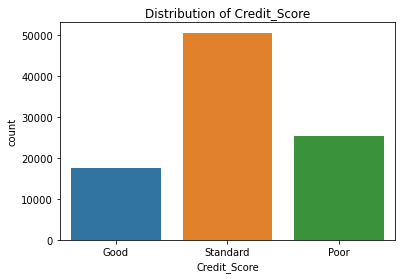

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(df_train['Credit_Score']).set_title('Distribution of Credit_Score')

plt.show()

In [128]:
# Target variable is fairly balanced.

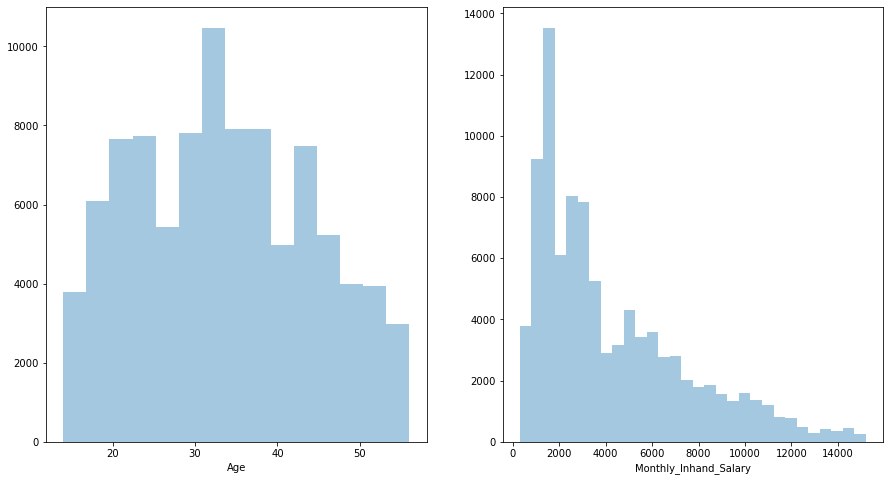

In [129]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df_train['Age'], bins=15, kde=False, ax = axes[0], axlabel='Age')
sns.distplot(df_train['Monthly_Inhand_Salary'], bins=30, kde=False, ax = axes[1], axlabel='Monthly_Inhand_Salary')
plt.show()

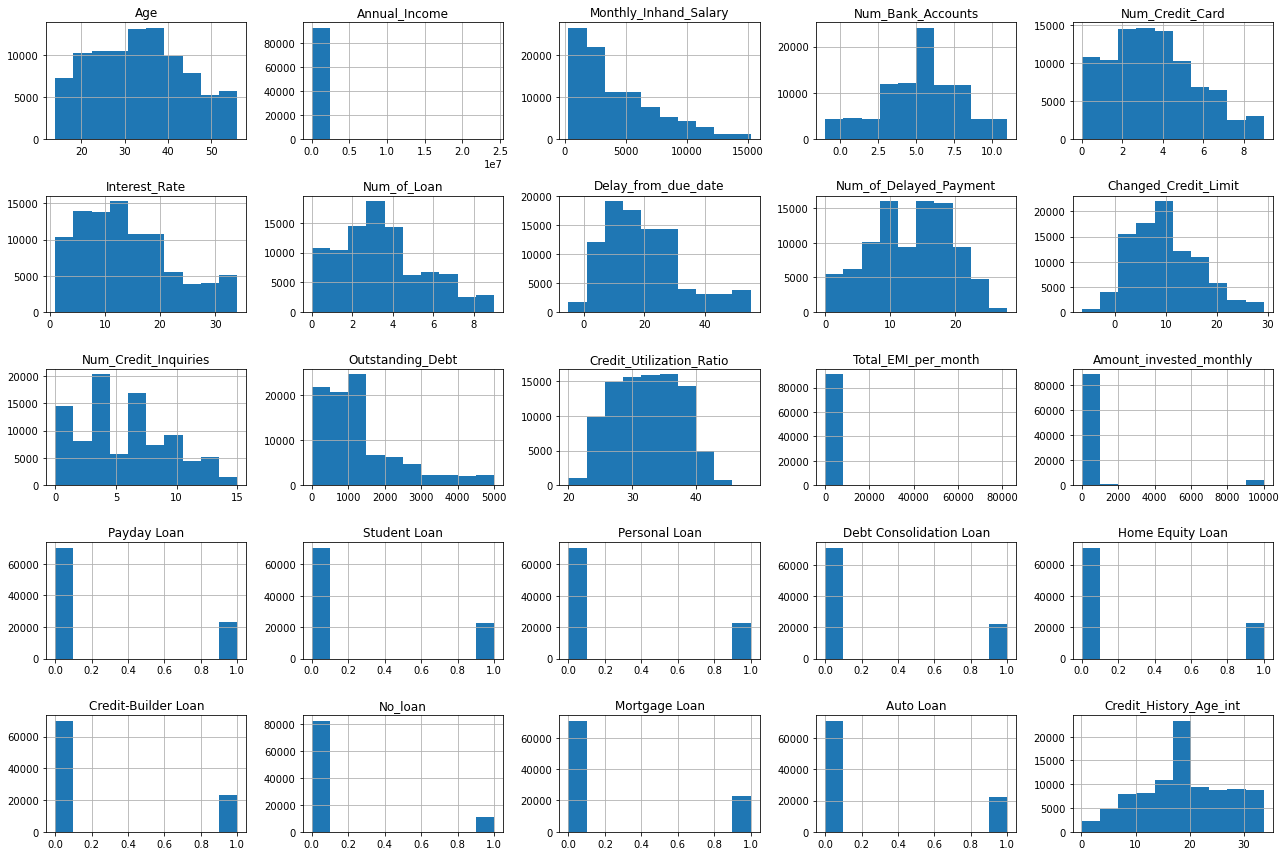

Skewness:


Age                         0.160497
Annual_Income              12.467654
Monthly_Inhand_Salary       1.095655
Num_Bank_Accounts          -0.145438
Num_Credit_Card             0.422006
Interest_Rate               0.593374
Num_of_Loan                 0.532115
Delay_from_due_date         0.828600
Num_of_Delayed_Payment     -0.150361
Changed_Credit_Limit        0.543656
Num_Credit_Inquiries        0.388673
Outstanding_Debt            1.330338
Credit_Utilization_Ratio    0.027882
Total_EMI_per_month         7.103945
Amount_invested_monthly     4.335294
Payday Loan                 1.164558
Student Loan                1.194242
Personal Loan               1.191403
Debt Consolidation Loan     1.228805
Home Equity Loan            1.208040
Credit-Builder Loan         1.147795
No_loan                     2.334626
Mortgage Loan               1.199257
Auto Loan                   1.223138
Credit_History_Age_int     -0.073527
dtype: float64

In [130]:
plt.rcParams["figure.figsize"] = [18,12]
df_train.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

df_train.skew()

In [131]:
#Numerical data of feature age, Num_Bank_Accounts, Interest_Rate, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Utilization_Ratio,Credit_History_Age is fairly symmetrical.
#Numerical data of feature Delay_from_due_date, Changed_Credit_Limit is moderately skewed.
#Numerical data of feature Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt,Total_EMI_per_month, Amount_invested_monthly is highly skewed.

Bivariate Analysis

Text(0.5, 1.0, 'Occupation VS. Credit Score')

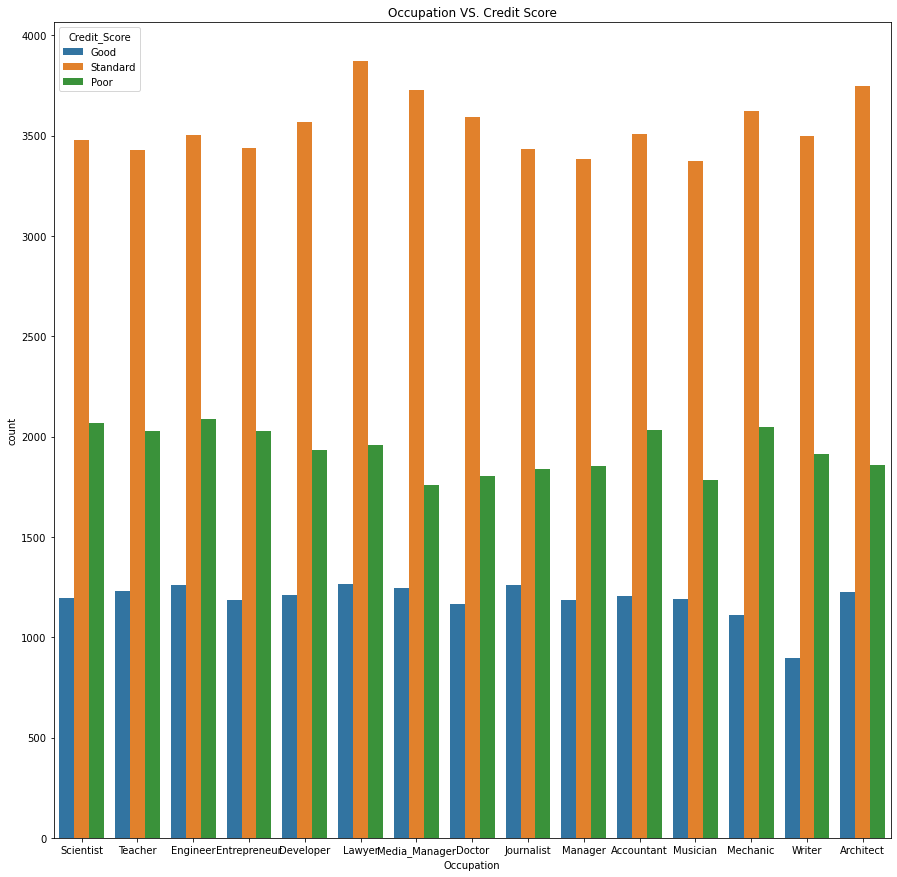

In [132]:
fig = plt.figure(figsize=(15,15))
sns.countplot(x= df_train_cat['Occupation'], hue = df_concat['Credit_Score']).set_title('Occupation VS. Credit Score')

In [133]:
# No significant variation is observed in the different buckets of credit score for customers belonging to different occupations.

Text(0.5, 1.0, 'Spending_Behaviour VS. Credit Score')

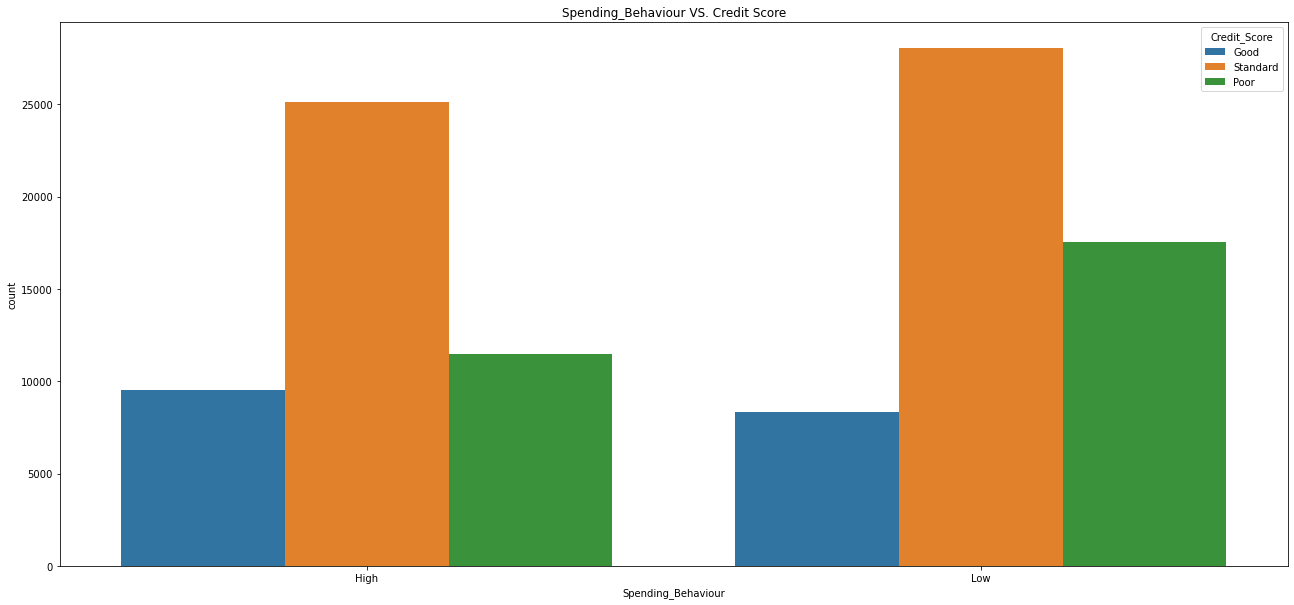

In [134]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Spending_Behaviour'], hue = df_concat['Credit_Score']).set_title('Spending_Behaviour VS. Credit Score')

In [135]:
# Majority of the customers with low spending behaviour are generally having standard or poor credit score.
# Count of the customers with high spending behaviour are having slightly good credit score compared to customers with high spending behaviour.

Text(0.5, 1.0, 'Payment_values VS. Credit Score')

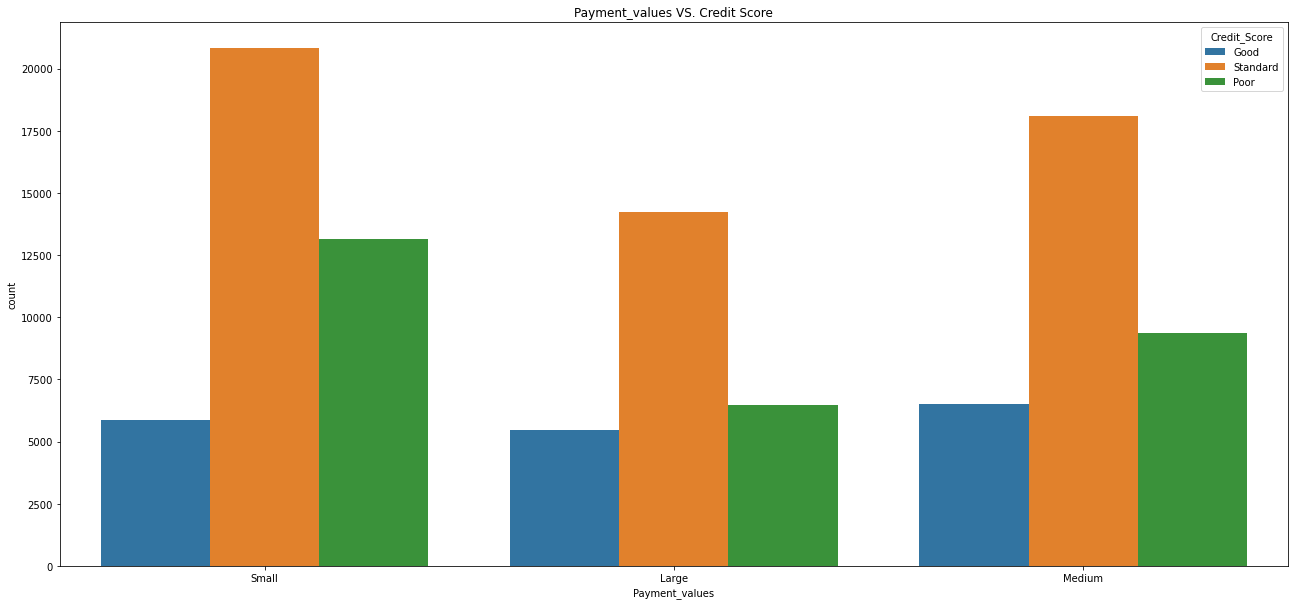

In [136]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_values'], hue = df_concat['Credit_Score']).set_title('Payment_values VS. Credit Score')

In [137]:
# The customers with small payment values are generally having standard or poor credit score.

Text(0.5, 1.0, 'Payment_of_Min_Amount VS. Credit Score')

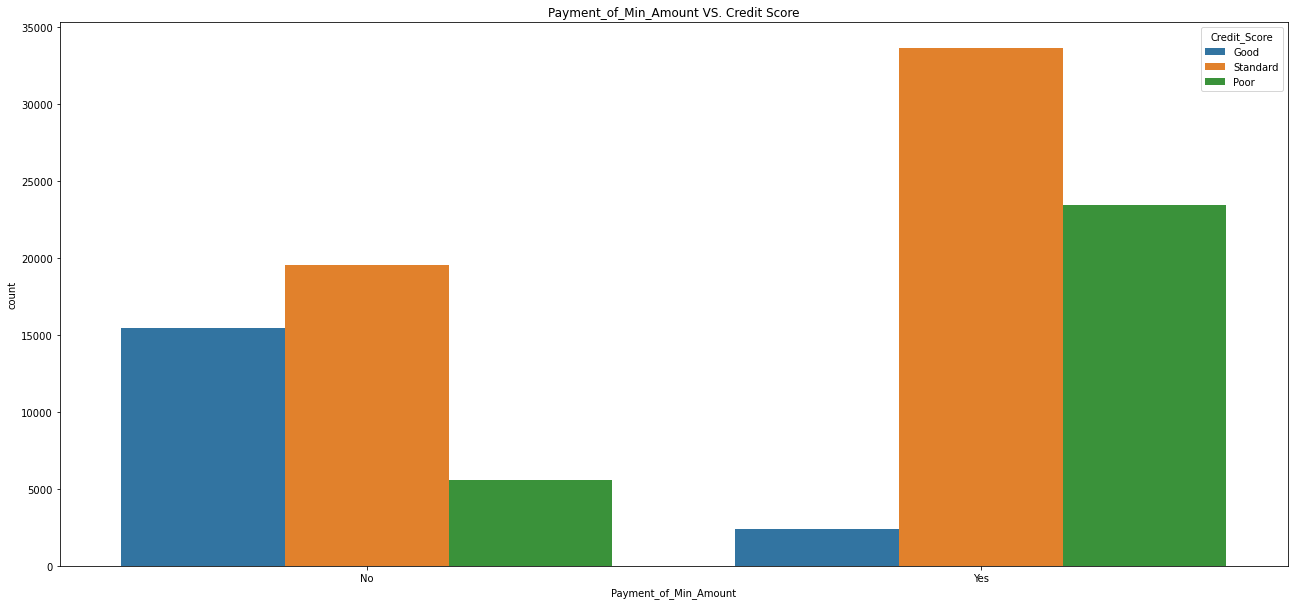

In [138]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_of_Min_Amount'], hue = df_concat['Credit_Score']).set_title('Payment_of_Min_Amount VS. Credit Score')

In [139]:
# Customers who has not paid only the minimum amount are having higher credit score.
# Payment_of_Min_Amount is found to be a very impacting feature in deciding the credit score.

Multivariate analysis

In [140]:
df_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Score',
       'Payday Loan', 'Student Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Credit-Builder Loan',
       'No_loan', 'Mortgage Loan', 'Auto Loan', 'Credit_History_Age_int',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [141]:
# Columns to be considered for multicollinearity check

c1 = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 
       'Total_EMI_per_month', 'Amount_invested_monthly']

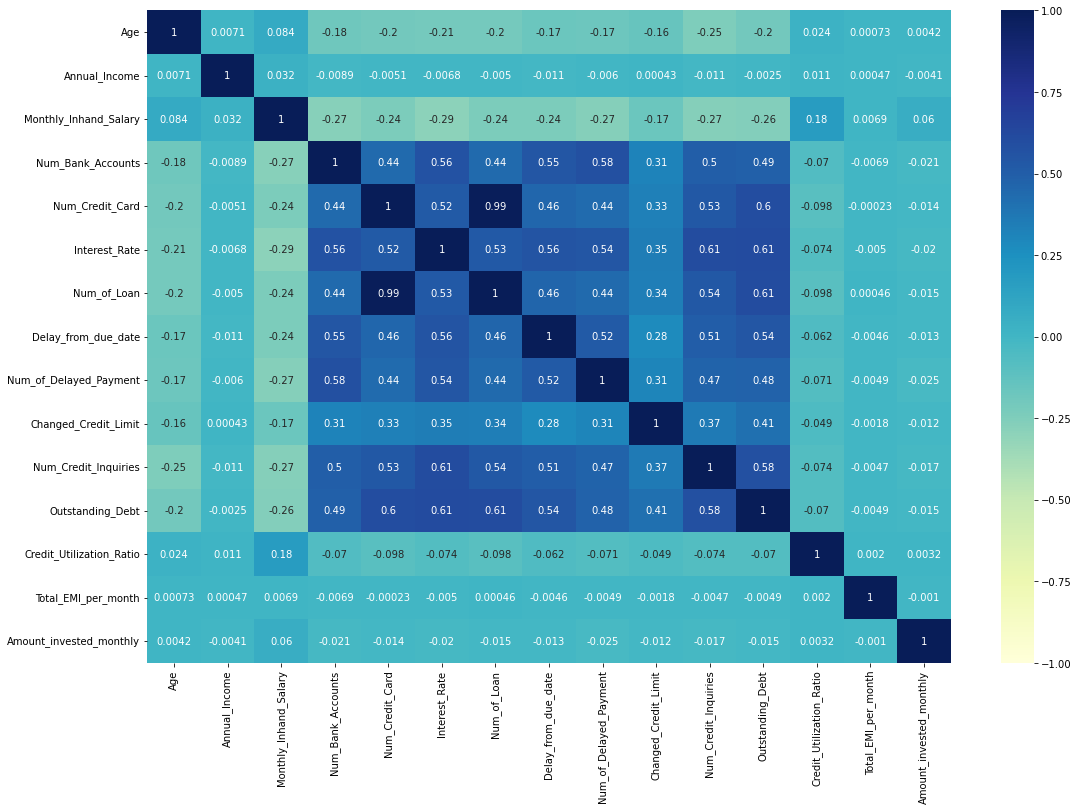

In [142]:
sns.heatmap(df_train[c1].corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

In [143]:
#Number of loans and number of credit cards are found to be highly corelated.

In [144]:
df_concat_new =df_concat.drop('Num_Credit_Card', axis=1)

# Statistical Analysis

Annual income

In [145]:
import statistics as st
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

In [146]:
# Hypothesis :
# Null hypothesis: Data is normal 
# Alternate hypothesis: Data is not normal.

stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value
# alpha = 0.01




(0.07417398691177368, 0.0)

In [147]:
# p < alpha
# Do reject null hypothesis.
# Data is not normal.

Lambda value used for Transformation: -0.2692489914889602


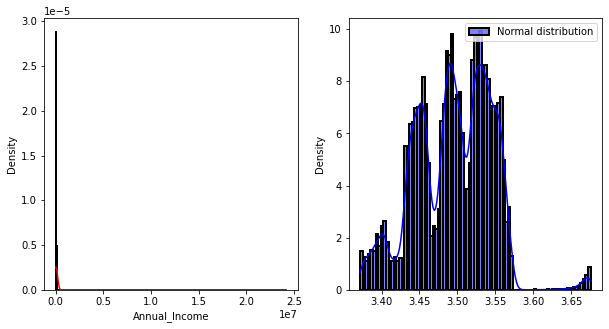

In [148]:
fittedData, lambdaValue = stats.boxcox(df_train['Annual_Income'])  
  
# creating the axes to draw plots of datasets  
fig, ax = plt.subplots(1, 2)  
  
#plotting the non-normal or original data using histplot() function  
sns.histplot(df_train['Annual_Income'], kde = True,stat="density",linewidth=2,label = "Non-Normal distribution", color ="red", ax = ax[0])  
  
#plotting the normal or original data using the histplot() function  
sns.histplot(fittedData, kde = True,stat="density",linewidth=2,label = "Normal distribution", color ="blue", ax = ax[1])  
  
# adding legends to the subplots  
plt.legend(loc = "upper right")  
# rescaling the subplots  
fig.set_figheight(5)  
fig.set_figwidth(10)  
print(f"Lambda value used for Transformation: {lambdaValue}")  
#displaying the plots  
plt.show()  

In [179]:
df_train['Annual_Income'] = fittedData
df_train['Annual_Income'].head()

0   3.452761
1   3.452761
2   3.452761
3   3.452761
4   3.452761
Name: Annual_Income, dtype: float64

In [150]:
stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value


(0.9718908667564392, 0.0)

dependence of the Occupation and Credit Score

In [151]:
Occupation=df_train["Occupation"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Occupation, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (159.29856638429587, 2.546830550258045e-20, 28, array([[1697.56133101, 3383.94260356, 1171.49606544],
       [1751.31427256, 3491.09447234, 1208.5912551 ],
       [1695.66097449, 3380.15440618, 1170.18461934],
       [1680.45812233, 3349.84882713, 1159.69305054],
       [1712.76418316, 3414.24818261, 1181.98763423],
       [1685.61623288, 3360.13107716, 1163.25268996],
       [1680.18664283, 3349.30765607, 1159.5057011 ],
       [1803.1668576 , 3594.45814374, 1244.37499866],
       [1620.73263171, 3230.79119514, 1118.47617314],
       [1708.69199062, 3406.13061679, 1179.17739259],
       [1712.22122416, 3413.1658405 , 1181.61293534],
       [1604.44386155, 3198.32093188, 1107.23520658],
       [1720.90856825, 3430.48331424, 1187.60811751],
       [1660.09715962, 3309.26099804, 1145.64184234],
       [1623.17594724, 3235.66173463, 1120.16231813]]))
Chi_square_critical:  3.8414588206941285


In [152]:
#Since the chi-square statistics 159.29 is very high than chi-square-critical value, the null hypothesis is rejected.
#Since the p-value is less than 0.05, the null hypothesis is rejected.
#It indicates that there is strong relation between Occupation and Credit score for 95% confidence level.

Checking a relationship between the Payment Behaviour and Credit Score

In [153]:
Spending_Behaviour=df_train["Spending_Behaviour"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Spending_Behaviour, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (847.4685347353172, 9.430742543609459e-185, 2, array([[11772.70863891, 23467.88277678,  8124.40858431],
       [13584.29136109, 27079.11722322,  9374.59141569]]))
Chi_square_critical:  3.8414588206941285


Checking a relationship between the Payment_values and Credit Score

In [154]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Spending Behaviour and Credit score for 95% confidence level.

In [155]:
Payment_values=df_train["Payment_values"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Payment_values, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (721.3287781805438, 8.389802696086054e-155, 4, array([[ 6690.6123465 , 13337.16063724,  4617.22701626],
       [ 8641.46405362, 17226.01583461,  5963.52011177],
       [10024.92359988, 19983.82352815,  6918.25287196]]))
Chi_square_critical:  3.8414588206941285


In [156]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Payment_values and Credit score for 95% confidence level.

Checking a relationship between the Payment Behaviour and Payment_values

In [186]:
Payment_values=df_train["Payment_values"]
Spending_Behaviour=df_train["Spending_Behaviour"]

stats_value= stats.chi2_contingency(pd.crosstab(Payment_values, Spending_Behaviour))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (5832.939935890832, 0.0, 2, array([[11442.14238301, 13202.85761699],
       [14778.44731968, 17052.55268032],
       [17144.41029731, 19782.58970269]]))
Chi_square_critical:  3.8414588206941285


In [ ]:
#It indicates that there is strong relation between Payment_values and Spending_Behaviour for 95% confidence level.

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93403 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       93403 non-null  float64
 1   Occupation                93403 non-null  object 
 2   Annual_Income             93403 non-null  float64
 3   Monthly_Inhand_Salary     93403 non-null  float64
 4   Num_Bank_Accounts         93403 non-null  float64
 5   Num_Credit_Card           93403 non-null  float64
 6   Interest_Rate             93403 non-null  float64
 7   Num_of_Loan               93403 non-null  float64
 8   Delay_from_due_date       93403 non-null  float64
 9   Num_of_Delayed_Payment    93403 non-null  float64
 10  Changed_Credit_Limit      93403 non-null  float64
 11  Num_Credit_Inquiries      93403 non-null  float64
 12  Credit_Mix                93403 non-null  object 
 13  Outstanding_Debt          93403 non-null  float64
 14  Credit

# Modelling

In [158]:
df1= df_train.copy()

In [159]:
df_train.drop('Credit_Score', axis=1,inplace=True)

In [160]:
df_cat=df_train.select_dtypes(include=[np.object])

In [161]:
df_num=df_train.select_dtypes(include=[np.number])

In [162]:
df_cat.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

In [163]:
df_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payday Loan',
       'Student Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Credit-Builder Loan', 'No_loan', 'Mortgage Loan',
       'Auto Loan', 'Credit_History_Age_int'],
      dtype='object')

In [164]:
df_cat.shape

(93403, 5)

In [165]:
df_num.shape

(93403, 25)

In [166]:

#df_num=df_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_num.head()

In [167]:
encode=pd.get_dummies(data=df_cat,drop_first=True)
encode.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Spending_Behaviour_Low,Payment_values_Medium,Payment_values_Small
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [168]:
df_train_full=pd.concat([df_num,encode],axis=1)
df_train_full.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payday Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Home Equity Loan,Credit-Builder Loan,No_loan,Mortgage Loan,Auto Loan,Credit_History_Age_int,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Spending_Behaviour_Low,Payment_values_Medium,Payment_values_Small
0,23.000000,3.452761,1824.843333,3.000000,4.000000,3.000000,4.000000,3.000000,7.000000,11.270000,4.000000,809.980000,26.822620,49.574949,80.415295,0,0,1,0,0,1,0,0,1,22.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,23.000000,3.452761,1824.843333,3.000000,4.000000,3.000000,4.000000,-1.000000,6.500000,11.270000,4.000000,809.980000,31.944960,49.574949,118.280222,0,0,1,0,0,1,0,0,1,17.916667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,33.000000,3.452761,1824.843333,3.000000,4.000000,3.000000,4.000000,3.000000,7.000000,0.000000,4.000000,809.980000,28.609352,49.574949,81.699521,0,0,1,0,0,1,0,0,1,22.250000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
3,23.000000,3.452761,1824.843333,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,6.270000,4.000000,809.980000,31.377862,49.574949,199.458074,0,0,1,0,0,1,0,0,1,22.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,23.000000,3.452761,1824.843333,3.000000,4.000000,3.000000,4.000000,6.000000,6.500000,11.270000,4.000000,809.980000,24.797347,49.574949,41.420153,0,0,1,0,0,1,0,0,1,22.416667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [187]:
df_train_full.shape

(93403, 45)

In [170]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

In [171]:
X=df_train_full.copy()
y=Y.copy()

# Train Test Split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25)


# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (70052, 45)
y_train (70052,)
X_test (23351, 45)
y_test (23351,)


In [188]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model

from sklearn import metrics
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Decision Tree (Entropy)

In [189]:
from sklearn.metrics import cohen_kappa_score

In [190]:
decision_tree_full_ent = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
decision_tree_full_ent = decision_tree_full_ent.fit(X_train, y_train)
y_pred_decision_tree_full_ent = decision_tree_full_ent.predict(X_test)



table_dct_train = classification_report(y_test, y_pred_decision_tree_full_ent)

# print the table
print(table_dct_train)

kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full_ent)
print('kappa value for test dataset:',kappa)

              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6324
           1       0.75      0.75      0.75     12595
           2       0.65      0.65      0.65      4432

    accuracy                           0.72     23351
   macro avg       0.70      0.70      0.70     23351
weighted avg       0.72      0.72      0.72     23351

kappa value for test dataset: 0.526078882200844


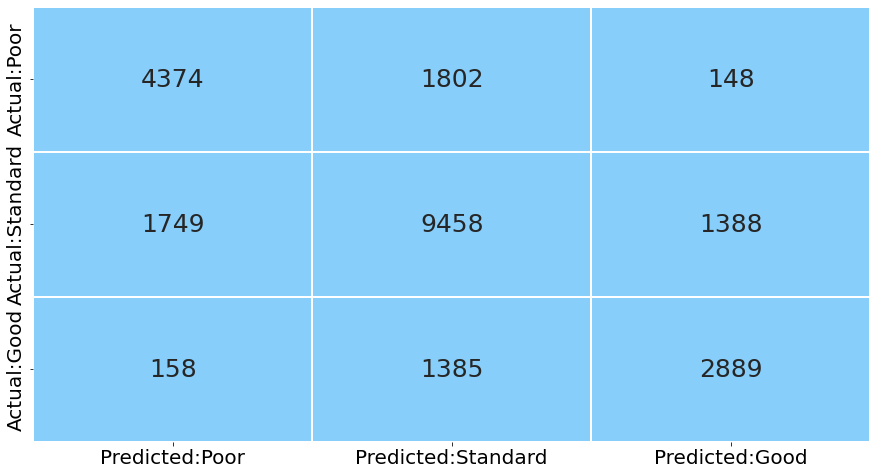

In [191]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full_ent)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:Poor','Predicted:Standard','Predicted:Good'], index = ['Actual:Poor','Actual:Standard', 'Actual:Good'])

plt.rcParams['figure.figsize'] = [15,8]

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [194]:
#important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': decision_tree_full_ent.feature_importances_})

#important_features.sort_values(by='Importance', ascending=False)

Random Forest

In [197]:
rf_classification = RandomForestClassifier(n_estimators = 50, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

kappa = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value for test dataset:',kappa)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6324
           1       0.82      0.81      0.82     12595
           2       0.76      0.75      0.75      4432

    accuracy                           0.80     23351
   macro avg       0.79      0.79      0.79     23351
weighted avg       0.80      0.80      0.80     23351

kappa value for test dataset: 0.6655843356335451


Adaboost

In [198]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [201]:
ada_model = AdaBoostClassifier(n_estimators = 100, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=10)

In [202]:
y_pred_ada = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_ada))

kappa = cohen_kappa_score(y_test, y_pred_ada)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.69      0.53      0.60      6324
           1       0.70      0.74      0.72     12595
           2       0.53      0.62      0.57      4432

    accuracy                           0.66     23351
   macro avg       0.64      0.63      0.63     23351
weighted avg       0.67      0.66      0.66     23351

kappa value: 0.4292908680269689


Gradient Boosting

In [204]:
gboost_model = GradientBoostingClassifier(n_estimators = 10, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=10, random_state=10)

In [205]:
y_pred_gboost = gboost_model.predict(X_test)

print(classification_report(y_test, y_pred_gboost))

kappa = cohen_kappa_score(y_test, y_pred_gboost)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      6324
           1       0.71      0.84      0.77     12595
           2       0.67      0.49      0.57      4432

    accuracy                           0.72     23351
   macro avg       0.72      0.66      0.68     23351
weighted avg       0.72      0.72      0.71     23351

kappa value: 0.5071027898715397


XG Boosting

In [206]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [207]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
kappa = cohen_kappa_score(y_test, y_pred_xgb)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6324
           1       0.81      0.81      0.81     12595
           2       0.74      0.75      0.75      4432

    accuracy                           0.79     23351
   macro avg       0.78      0.78      0.78     23351
weighted avg       0.79      0.79      0.79     23351

kappa value: 0.6567766289198556


In [ ]:
#XGBoost model shows best performance parameters on test set.

In [233]:
kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

xgbc_score = cross_val_score(xgb_model, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(xgbc_score)
print('Cross-Val Score: ' ,xgbc_score.mean())

[0.79830853 0.80002141 0.7986297  0.79689507 0.79443255 0.80278373
 0.79860814 0.8012848  0.80203426 0.798394  ]
Cross-Val Score:  0.7991392188475344


# Feature Selection

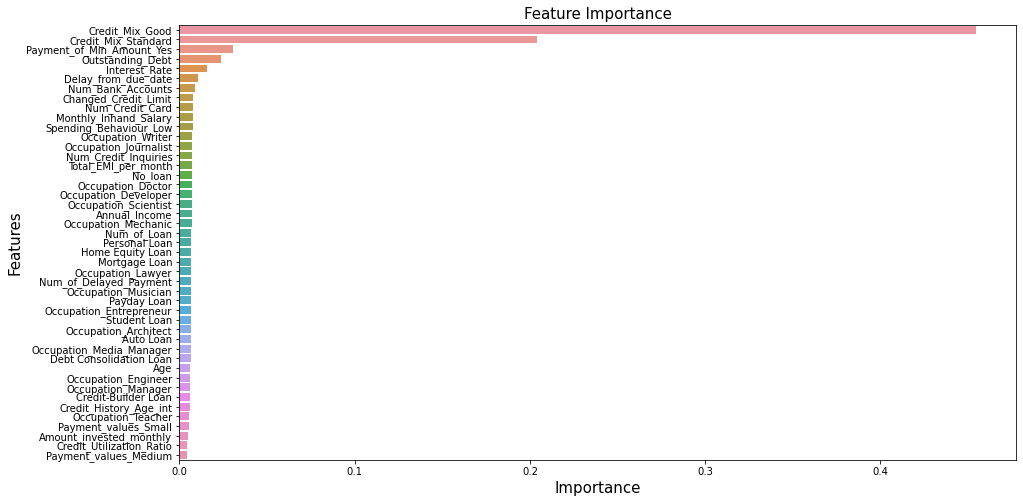

In [213]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

important_features_sorted = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features_sorted)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [222]:
dfs=important_features_sorted['Features'][:10].to_frame().reset_index()

In [228]:
l1 =list(dfs['Features'])

In [230]:
xgb_model_top_10_features = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model_top_10_features.fit(X_train.loc[:,l1], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [232]:
y_pred_xgb_top10 = xgb_model_top_10_features.predict(X_test.loc[:,l1])

print(classification_report(y_test, y_pred_xgb_top10))
kappa = cohen_kappa_score(y_test, y_pred_xgb_top10)
print('kappa value:',kappa)


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6324
           1       0.81      0.80      0.81     12595
           2       0.73      0.75      0.74      4432

    accuracy                           0.79     23351
   macro avg       0.77      0.78      0.78     23351
weighted avg       0.79      0.79      0.79     23351

kappa value: 0.644463983487382


# Hypertuning Parameters

In [248]:
tuning_parameters = {'learning_rate': [0.1, 0.2],
                     'max_depth': range(8,15,2),
                     'gamma': [0, 1]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model_top_10_features, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy')

xgb_grid.fit(X_train.loc[:,l1], y_train)



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=None,
            

In [249]:
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 12} 



In [236]:
def get_test_report(model):

    test_pred = model.predict(X_test.loc[:,l1])

    return(classification_report(y_test, test_pred))

In [250]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train.loc[:,l1], y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      6324
           1       0.81      0.80      0.81     12595
           2       0.74      0.75      0.74      4432

    accuracy                           0.79     23351
   macro avg       0.77      0.78      0.78     23351
weighted avg       0.79      0.79      0.79     23351



In [243]:
xgb_grid_model = XGBClassifier(learning_rate = 0.1,
                               max_depth = 11,
                              gamma =1)

xgb_model = xgb_grid_model.fit(X_train.loc[:,l1], y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      6324
           1       0.81      0.77      0.79     12595
           2       0.66      0.77      0.71      4432

    accuracy                           0.77     23351
   macro avg       0.75      0.77      0.76     23351
weighted avg       0.77      0.77      0.77     23351



# Using Test Dataset (df_test) for testing the model

Testing the model on test dataset (remaining 50000 observations)

In [ ]:
df2=df_test.copy()

In [ ]:
df_test.info()

In [ ]:
#yt = pd.DataFrame(df_test['Credit_Score'])

In [ ]:
df_test = df_test.drop('Credit_Score', axis=1)

In [ ]:
df_test_num = df_test.select_dtypes(include=np.number)

In [ ]:
df_test_cat = df_test.select_dtypes(include=np.object)

In [ ]:
df_test_num.shape

In [ ]:
df_test_cat.shape

In [ ]:
#df_test_num = df_test_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_test_num.head()

In [ ]:
encode=pd.get_dummies(data=df_test_cat,drop_first=True)
encode.head()

In [ ]:
df_test_full = pd.concat([df_test_num, encode], axis=1)
df_test_full.head()

In [ ]:
df_test_full.shape

In [ ]:
y_pred=xgb_grid_model.predict(df_test_full)

In [ ]:
y_pred

# Combining test dataset output with Customer ID

Pulling customer details of test obervations

In [ ]:
df_test_with_cust_id =pd.read_csv('test.csv')
df_test_with_cust_id.head().T

In [ ]:
Predicted_credit_Score= pd.DataFrame(y_pred)
Predicted_credit_Score.shape

In [ ]:
Customer_ID= pd.DataFrame(df_test_with_cust_id['Customer_ID'])
Customer_ID.shape

In [ ]:
output_dataset= pd.concat([Customer_ID,Predicted_credit_Score], axis=1)
output_dataset.head(100)

In [ ]:
output_dataset.columns = ['Customer ID','Predicted credit Score']

In [ ]:
output_dataset.head(100)

In [ ]:
output_dataset.to_excel(r'C:\Users\lenova\Documents\In class work files\ML project\Project 4 (1)\Output_dataset_new.xlsx', index=False)